In [1]:
import ipynb.fs.full.preProcessing as preProcess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import json
import seaborn as sns


LGA Name : object
Region : object
2011 : float64
2012 : float64
2013 : float64
2014 : float64
2015 : float64
2016 : float64
2017 : float64
2018 : float64
2019 : float64
2020 : float64
Year : int64
Year ending : object
Police Region : object
Local Government Area : object
Offence Count : object
Rate per 100,000 population : object
Year : int64
Year ending : object
Police Region : object
Local Government Area : object
Offence Count : float64
Rate per 100,000 population : float64
Check union of LGA:  56


Overall correlation: 
[[1.         0.97560368]
 [0.97560368 1.        ]]


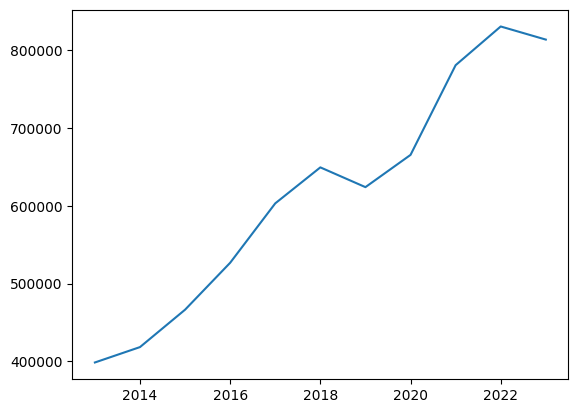

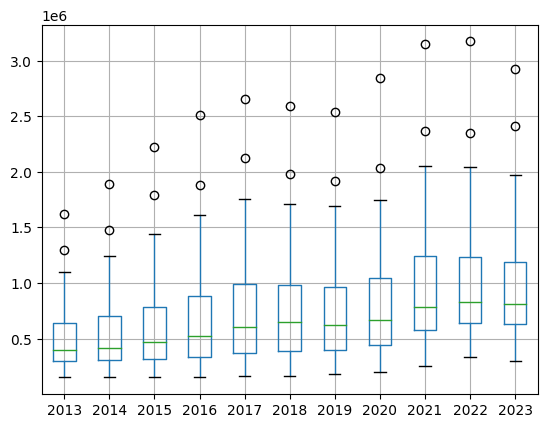

alpine 0.9318328271576923
ballarat 0.9754021603989012
banyule 0.9610703816046463
basscoast 0.9445221528172084
bawbaw 0.974026375020985
bayside 0.9375630932509245
benalla 0.9383275729445316
boroondara 0.9249531992969966
brimbank 0.9599743718923477
campaspe 0.9230059251937328
cardinia 0.9827152729824793
casey 0.9791116823782523
centralgoldfields 0.904711670058307
colacotway 0.9731902281317015
darebin 0.9510880414576748
eastgippsland 0.9383084453825546
frankston 0.9700758088198992
gleneira 0.9250026351996868
glenelg 0.897635953531084
greaterbendigo 0.9095984269686046
greaterdandenong 0.9446552359277812
greatergeelong 0.9681327351858448
greatershepparton 0.9459085278841044
hobsonsbay 0.9507880932680587
horsham 0.9133843849721108
hume 0.9537054132697864
kingston 0.9414150049157305
knox 0.9508346846212995
latrobe 0.9008008877359409
macedonranges 0.9637298266579285
manningham 0.9237020978640715
maribyrnong 0.9124722477770719
maroondah 0.9542333682015894
melbourne 0.8855155522008632
melton 0.9

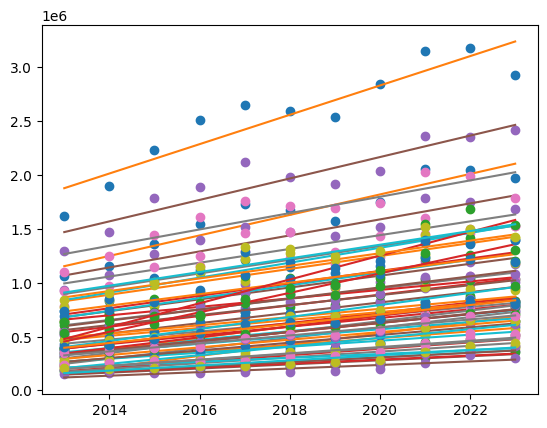

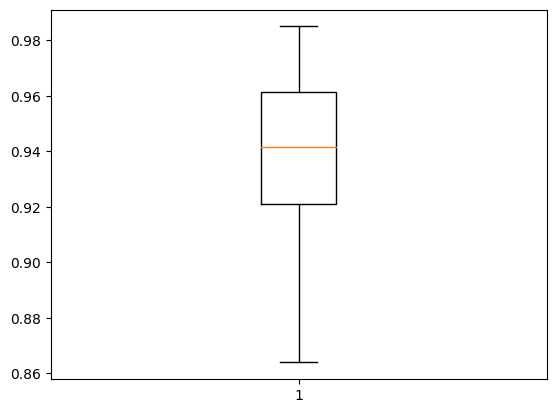

In [2]:
# EDA Housing price + Trend Analysis:
# All housing price has an increasing trend over-time, with high
# correlation coeff, showing a linear trend (or due to minimal points)
# Minimum coefficient: 0.7969 for Westwimmera (the rest is overall above 90)

# Outlier points: There are variation and sometimes almost curving.
# Difficult to tell due to only 10 data points. Stands out for Moirra 2022.

# Distribution across LGA: Skewed, shown in box plot, with upper extremes

# Group by LGA and take average price
housingPriceGroup = preProcess.cleanedHousingPrice

# Check trend
x_axis = np.array([i for i in range(2013, 2024)])
print("Overall correlation: ")
print(np.corrcoef(x_axis, housingPriceGroup.mean()))
plt.figure()
plt.plot(x_axis, housingPriceGroup.median())
plt.show()

# Check distribution of housing price across LGA for each year
plt.figure()
# plt.boxplot([housingPriceGroup[str(i)] for i in range(2013, 2024)])
housingPriceGroup.boxplot(column=[str(i) for i in range(2013, 2024)])
plt.show()

all_corr = []
plt.figure()
for lga in housingPriceGroup.index:
    corr = np.corrcoef(x_axis, housingPriceGroup.loc[lga])[0][1]
    print(lga, corr)
    all_corr.append(corr)

    m, b = np.polyfit(x_axis, housingPriceGroup.loc[lga], 1)

    # Use plt.figure() to plot for each housing on different figure
    plt.plot(x_axis, housingPriceGroup.loc[lga], 'o')
    plt.plot(x_axis, m * x_axis + b)
plt.show()

plt.figure()
plt.boxplot(all_corr)
plt.show()


Overall correlation: 
[[ 1.         -0.30947825]
 [-0.30947825  1.        ]]


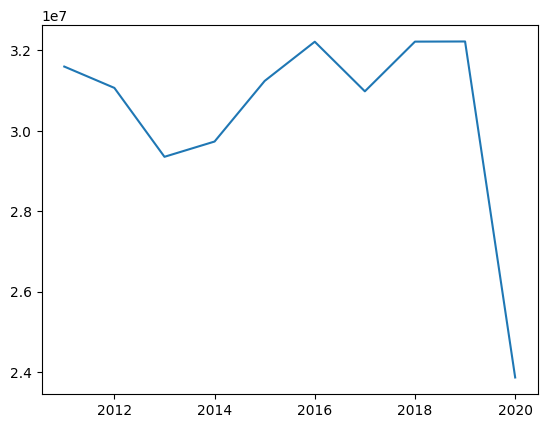

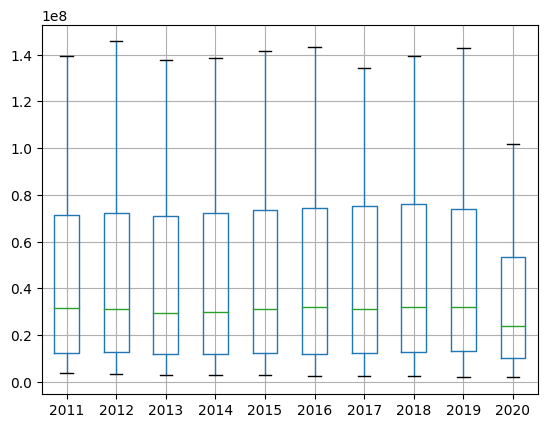

whittlesea 0.04761322938200142
northerngrampians -0.8518988503721039
greatergeelong -0.3907909315855411
colacotway -0.613263867286729
moorabool 0.17749984163788546
centralgoldfields -0.6992628714296889
mitchell 0.2348334292616106
alpine -0.9596758676945008
benalla 0.5463265770046716
campaspe 0.2924894274079077
glenelg -0.6745413842378463
wellington -0.7728893316738793
wodonga -0.4120921583236482
greaterbendigo -0.12855612035640362
ballarat -0.36947971086130105
swanhill 0.26802031995116105
greatershepparton 0.03196538412559459
mildura 0.32644735608112285
eastgippsland -0.1927103853150085
basscoast -0.46469707393461485
latrobe -0.6236734852421043
surfcoast -0.3334740346932587
southgippsland -0.6269369740169284
macedonranges -0.3596220899071647
horsham -0.37954181347388327
bawbaw 0.6042573845762607
wangaratta 0.026240971337788643
melbourne 0.32693412398989147
merribek -0.7211688387954382
darebin -0.704780465380674
boroondara -0.46320087448171704
whitehorse -0.578078988028986
manningham -0

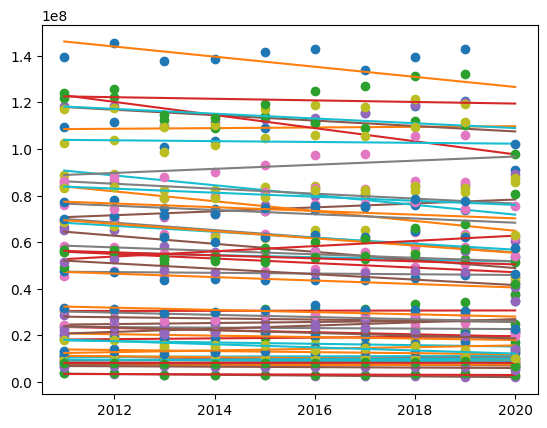

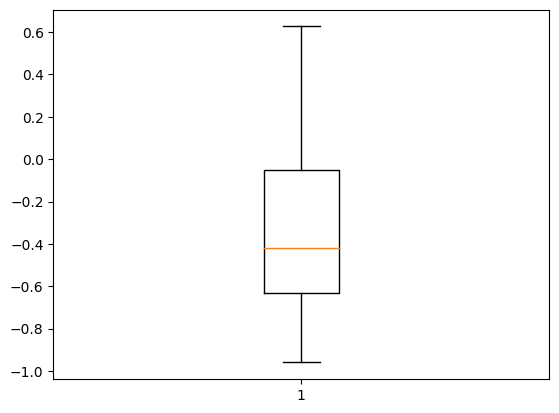

In [3]:
# EDA EGM
# Outlier: Sharp drop in 2020 (due to Covid 19)
# Across time: No clear linear relationship overall with total media, 
# and the linear trend varies widely between different LGA (covering from -1 to 1 without 2020
# and -1 to 0.6 with 2020).
# Across LGA: Skewed toward the higher extreme, but with no outliers 

egmGroup = preProcess.cleanedEgm

# Check trend. Change to (2011, 2020) to ignore the 2020 outlier.
x_axis = np.array([i for i in range(2011, 2021)])

plt.figure()
print("Overall correlation: ")
print(np.corrcoef(x_axis, egmGroup.median()[:len(x_axis)]))
plt.plot(x_axis, egmGroup.median()[:len(x_axis)])
plt.show()

# Check distribution of housing price across LGA for each year
plt.figure()
egmGroup.boxplot(column=[str(i) for i in x_axis])
plt.show()

all_corr = []
plt.figure()
for lga in egmGroup.index:
    corr = np.corrcoef(x_axis, egmGroup.loc[lga][:len(x_axis)])[0][1]
    print(lga, corr)
    all_corr.append(corr)

    m, b = np.polyfit(x_axis, egmGroup.loc[lga][:len(x_axis)], 1)

    # Use plt.figure() to plot for each housing on different figure
    # plt.figure()
    plt.plot(x_axis, egmGroup.loc[lga][:len(x_axis)], 'o')
    plt.plot(x_axis, m * x_axis + b)
    # plt.show()

plt.show()

plt.figure()
plt.boxplot(all_corr)
plt.show()



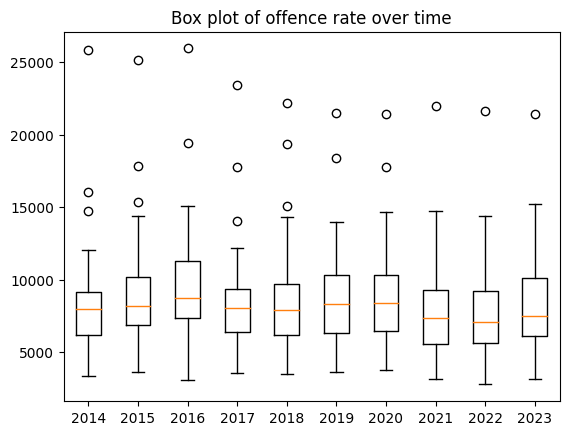

Overall coefficient
[[ 1.        -0.6275269]
 [-0.6275269  1.       ]]


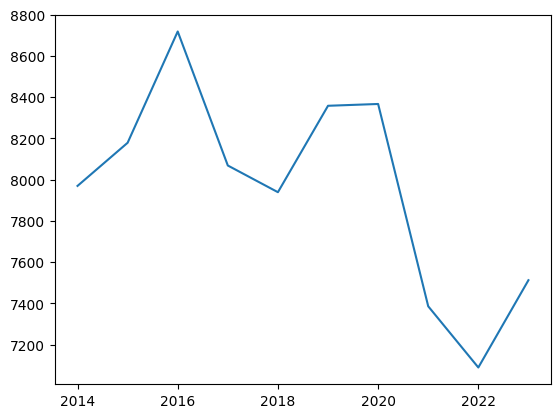

banyule -0.7435998951602791
brimbank -0.19958648776423563
darebin -0.7200070216208568
hobsonsbay -0.8617779059182076
hume -0.832350447815227
maribyrnong 0.1448361833561788
melbourne -0.8806088153726506
melton -0.6774853015236196
merribek -0.708319674644351
mooneevalley -0.85415573821093
whittlesea -0.7770194134105095
wyndham -0.6992425714103824
yarra -0.7508748538483996
alpine 0.24317347932967506
basscoast -0.5886625788586605
bawbaw -0.297406913192657
benalla 0.353606866699459
boroondara 0.30914614058982753
eastgippsland 0.8065436771342204
greatershepparton 0.561268243132229
knox -0.21096800297951
latrobe -0.5542772910683488
manningham -0.26309767392589456
maroondah -0.6298447391061289
mitchell -0.5142403229646098
monash 0.6731102790696738
southgippsland 0.9185400432406692
wangaratta -0.02722552909693768
wellington 0.202449470533715
whitehorse 0.38504645694966316
wodonga 0.2856181471475863
yarraranges -0.34422768920167635
bayside 0.43672384089729843
cardinia -0.6909520863171269
casey -

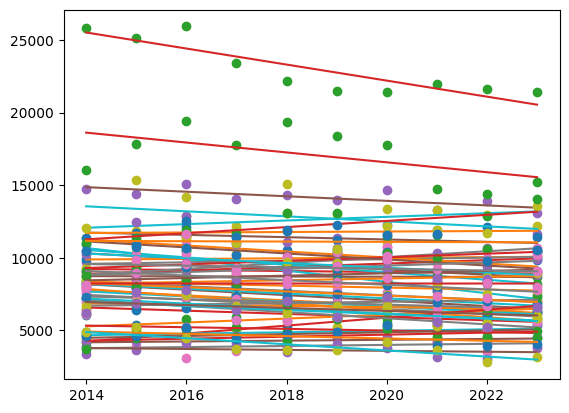

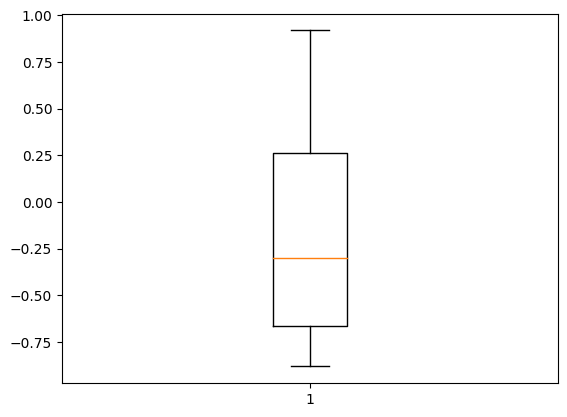

In [4]:
# EDA Offence count
# Across LGA in each year: Slightly skewed to higher extreme, with several outliers.
# melbourne is the only place with extremely high offence rate > 20,000 all year (need to check if it's 
# city or the region, since the population is higher than expected)

# Across time: Sharp drop in 2021, 2022 (might be due to covid19), 
# with overall down trend. Excluding the drop in 2021, no significant trend in overall median,
# and across each lga, with the correlation coefficient spanning (-0.75, near 1)

offences = preProcess.cleanedOffences

allYear = offences["Year"].unique()[::-1]

# Group by time and check the median rate
yearGroup = [offences[offences["Year"] == year]["Rate per 100,000 population"] for year in allYear]

plt.figure()
plt.title("Box plot of offence rate over time")
plt.boxplot(yearGroup)
plt.xticks([i for i in range(1, len(allYear) + 1)], allYear)
plt.show()

plt.figure()
print("Overall coefficient")
print(np.corrcoef(allYear, [np.median(group) for group in yearGroup]))
plt.plot(allYear, [np.median(group) for group in yearGroup])
plt.show()

all_corr = []
plt.figure()
for lga in offences["Local Government Area"].unique():
    lgaYear = [offences[(offences["Local Government Area"] == lga)
                        & (offences["Year"] == year)]["Rate per 100,000 population"].iloc[0] for year in allYear]
    corr = np.corrcoef(allYear, lgaYear)[0][1]
    print(lga, corr)
    all_corr.append(corr)

    m, b = np.polyfit(allYear, lgaYear, 1)

    # Use plt.figure() to plot for each housing on different figure
    # plt.figure()
    plt.plot(allYear, lgaYear, 'o')
    plt.plot(allYear, m * allYear + b)
    # plt.show()
plt.show()


plt.figure()
plt.boxplot(all_corr)
plt.show()


In [ ]:
# EDA for communities
communities = preProcess.cleanedCommunities



In [5]:
# # Plot EGM offence count against financial loss
# # Run this to plot for each LGA
# egm_offence_data = {
#     'Year': [],
#     'loss': [],
#     'offence_count': [],
# }

# for name, group in preProcess.egm.groupby('LGA Name'):
#     egm_offence_data = {
#         'Year': [],
#         'loss': [],
#         'offence_count': [],
#     }
#     for year in range(2014, 2021):
#         egm_offence_data['Year'].append(year)
#         egm_offence_data['loss'].append(group[str(year)].sum())
#         egm_offence_data['offence_count'].append(
#             preProcess.offences.loc[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name), 'Offence Count'].sum()
#         )

#     # Create scatter plot using Seaborn
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x='loss', y='offence_count', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

#     # Add labels and title
#     plt.xlabel('Total loss per LGA' + f"at {name}")
#     plt.ylabel('Offence Count')
#     plt.title('Total loss per LGA vs Offence count')

# # Show the plot
# plt.show()

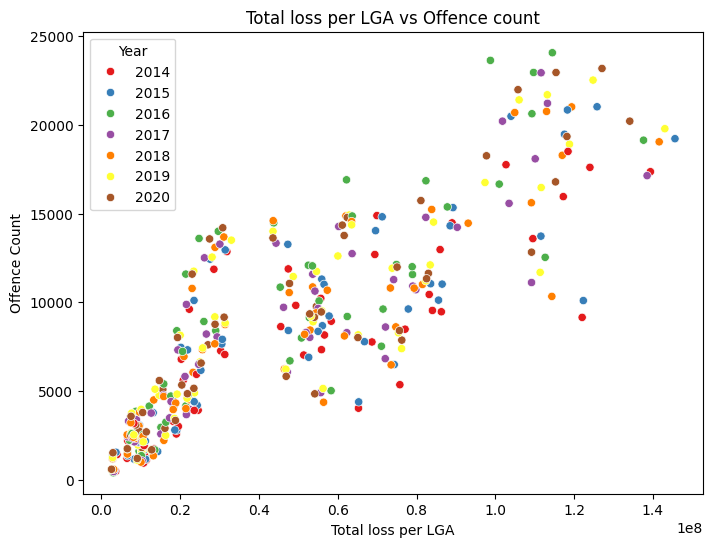

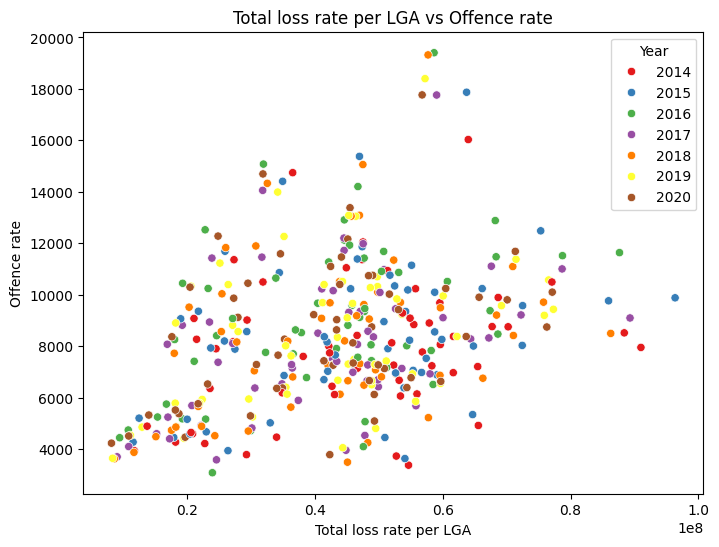

Year
2014    0.973804
2015    0.994619
2016    1.019397
2017    1.040310
2018    1.060052
2019    1.079054
2020    1.092178
Name: population, dtype: float64


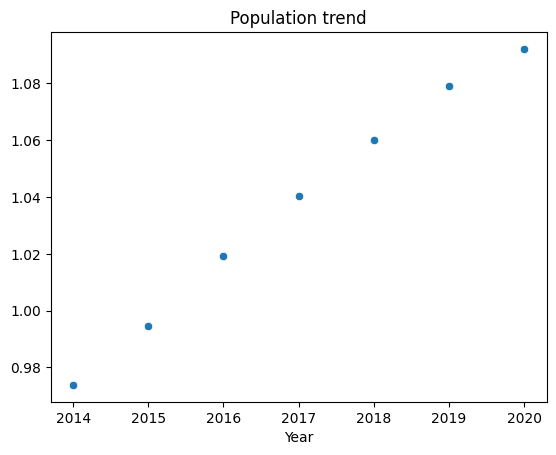

[[1.        0.8589164]
 [0.8589164 1.       ]]
[[1.        0.3482893]
 [0.3482893 1.       ]]


In [6]:
# Trend analysis - EGM loss and offence count
# Plot EGM loss per person against offence count
# Check using EGM off by 3 years: Still work
egm_offence_data = {
    'Year': [],
    'loss': [],
    'offence_count': [],
    'lga': [],
    'offence_rate': [],
    'loss_rate': [],
    "population": []
}

for name, group in preProcess.egm.groupby('LGA Name'):
    # Ignore melbourne, since it's an outlier (probably because melbourne and city of melbourne is not the same thing)
    if name == "melbourne":
        continue
    for year in range(2014, 2021):
        offence_count = preProcess.offences[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name)]['Offence Count'].iloc[0]
        offence_rate = preProcess.offences[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name)]['Rate per 100,000 population'].iloc[0]
        population = offence_count/offence_rate
        loss = group[str(year - 3)].sum()

        egm_offence_data['Year'].append(year)
        egm_offence_data['lga'].append(name)
        egm_offence_data['loss'].append(loss)
        egm_offence_data['offence_count'].append(offence_count)
        egm_offence_data['offence_rate'].append(offence_rate)
        egm_offence_data['loss_rate'].append(loss/population)
        egm_offence_data['population'].append(population)

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_count', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

# Add labels and title
plt.xlabel('Total loss per LGA')
plt.ylabel('Offence Count')
plt.title('Total loss per LGA vs Offence count')

# Show the plot
plt.show()

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss_rate', y='offence_rate', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

# Add labels and title
plt.xlabel('Total loss rate per LGA')
plt.ylabel('Offence rate')
plt.title('Total loss rate per LGA vs Offence rate')

# Show the plot
plt.show()

# Plot population
egm_frame = pd.DataFrame(egm_offence_data)
egm_group = egm_frame.groupby("Year")["population"].mean()
print(egm_group)
plt.figure()
plt.title("Population trend")
sns.scatterplot(x=egm_group.index, y=egm_group.values)
plt.show()

print(np.corrcoef(egm_offence_data['loss'], egm_offence_data['offence_count']))
print(np.corrcoef(egm_offence_data['loss_rate'], egm_offence_data['offence_rate']))

C:\Users\DELL\AppData\Local\Temp\ipykernel_14772\1839650114.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


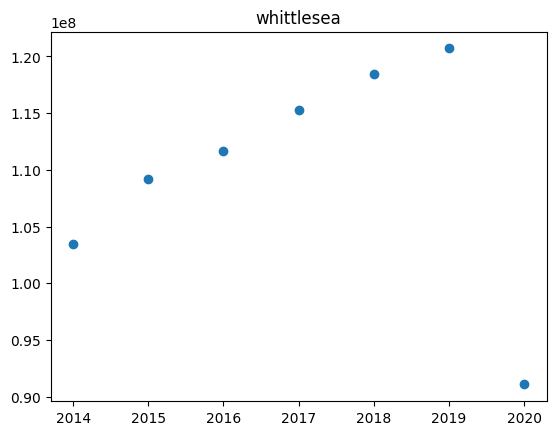

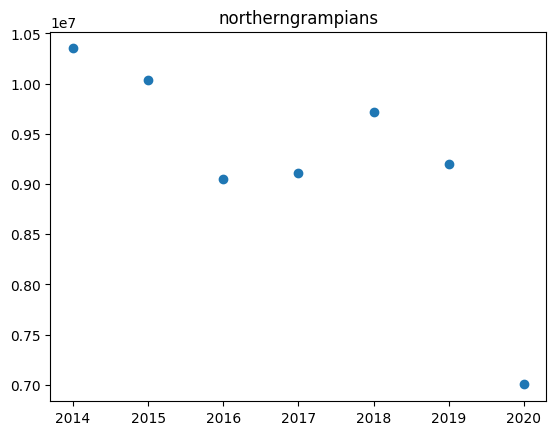

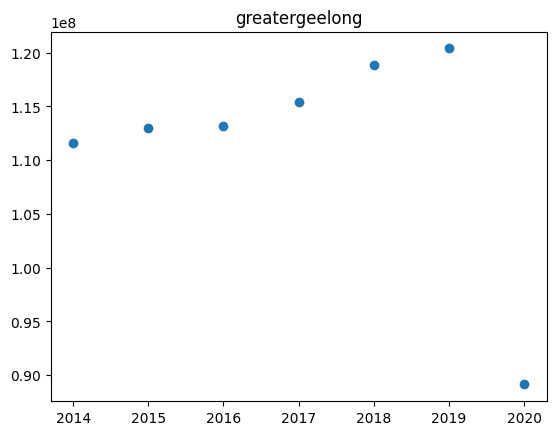

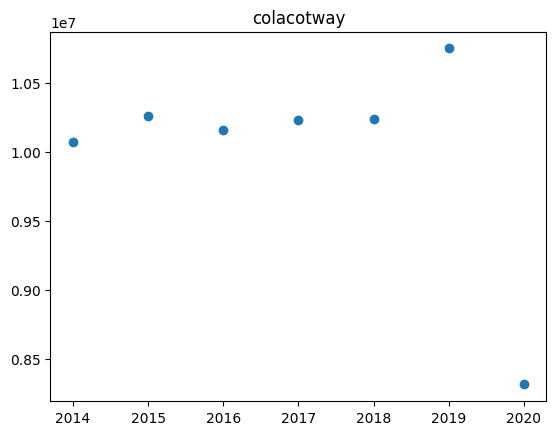

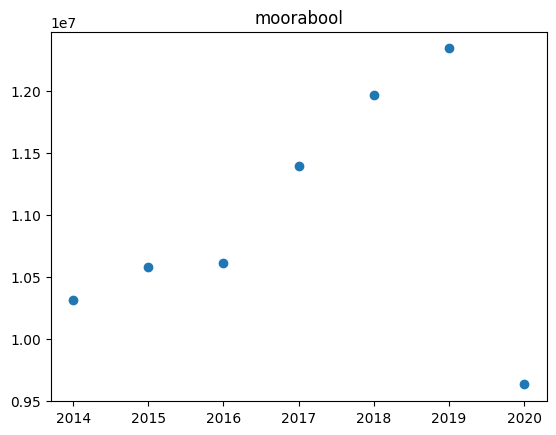

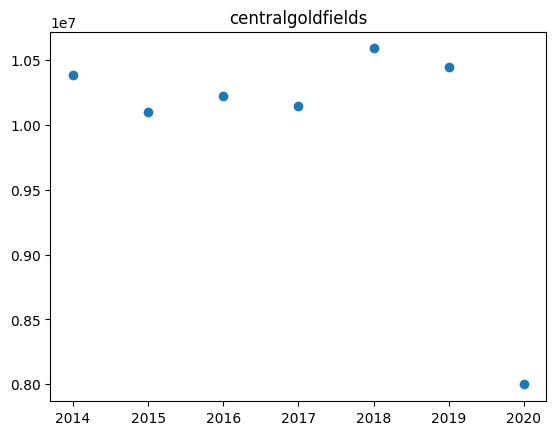

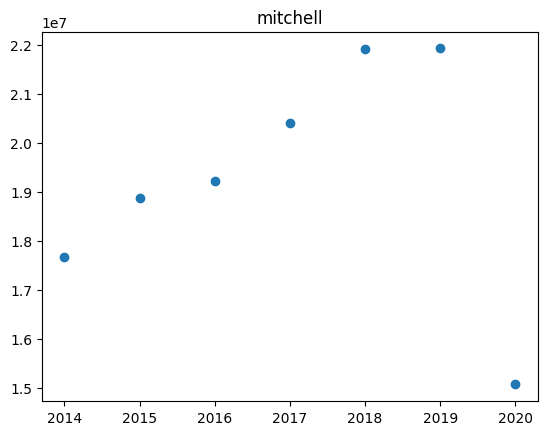

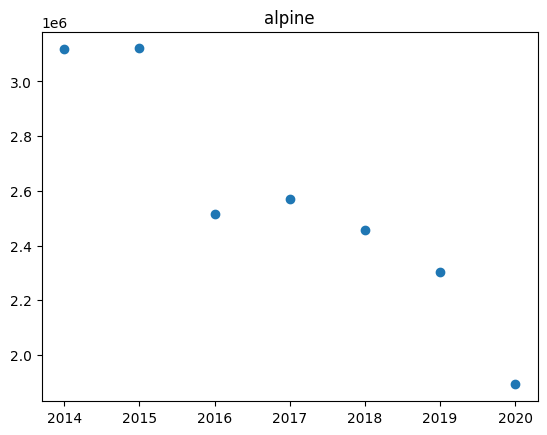

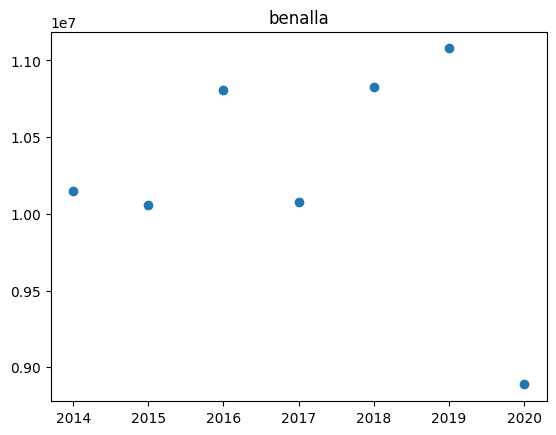

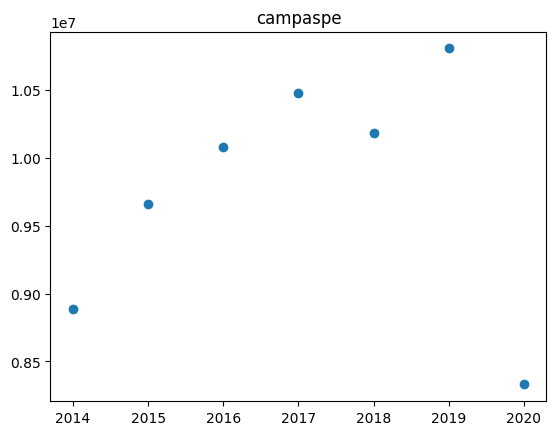

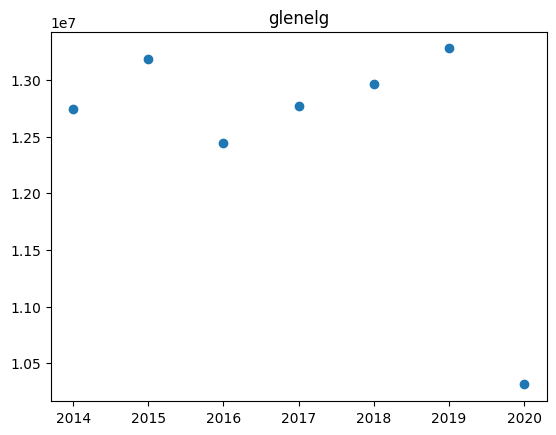

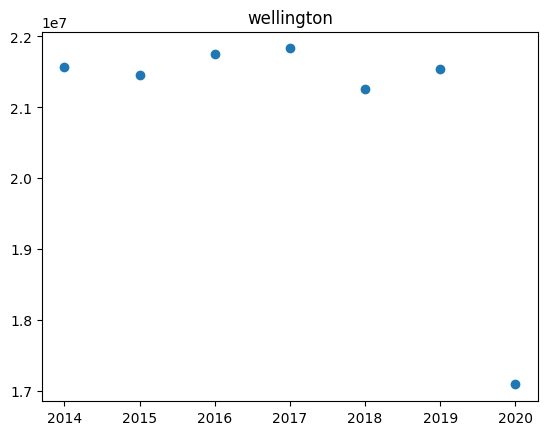

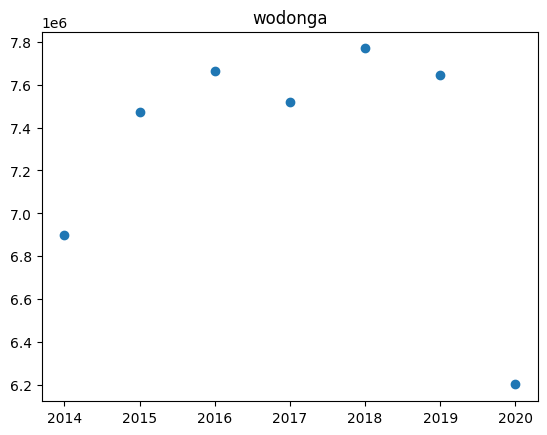

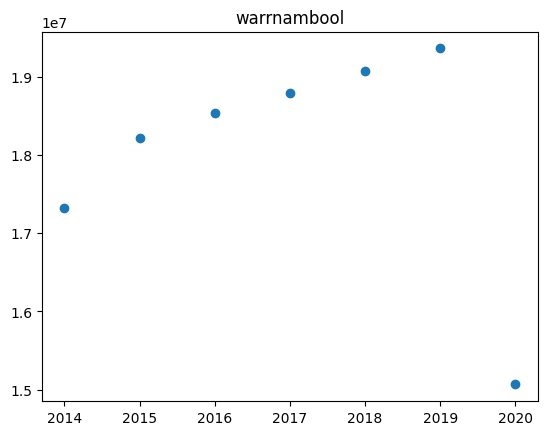

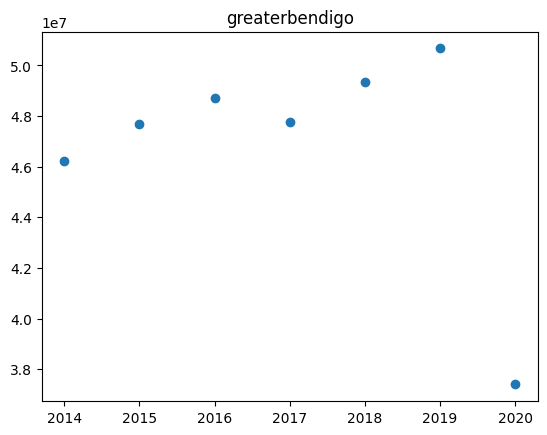

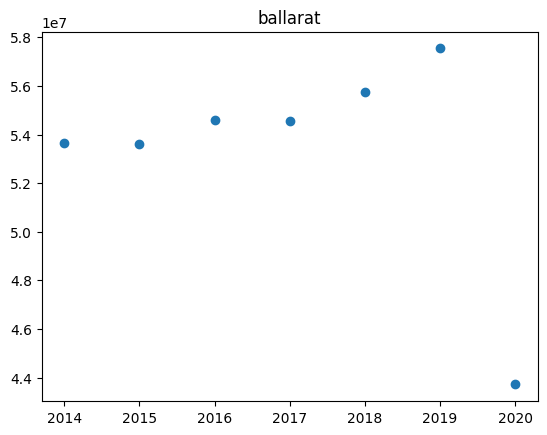

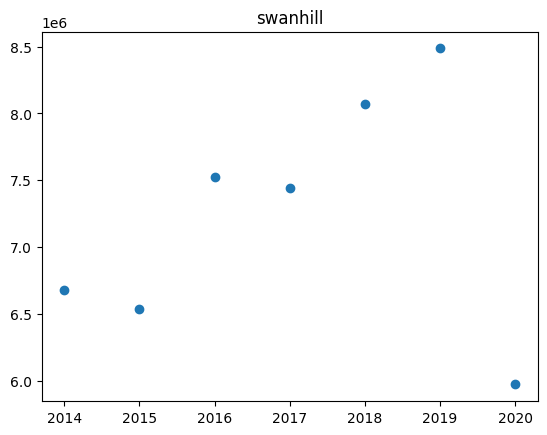

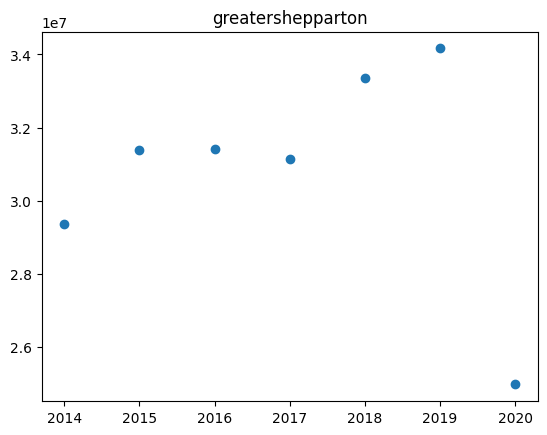

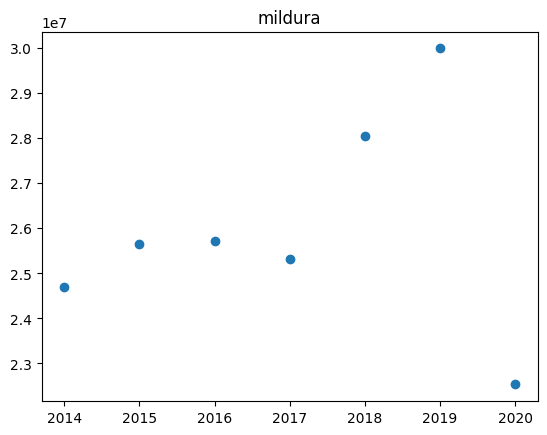

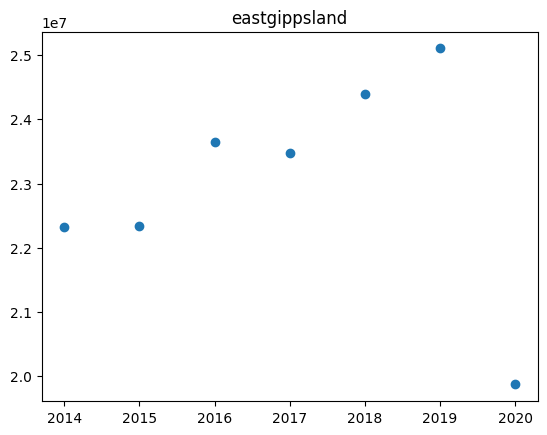

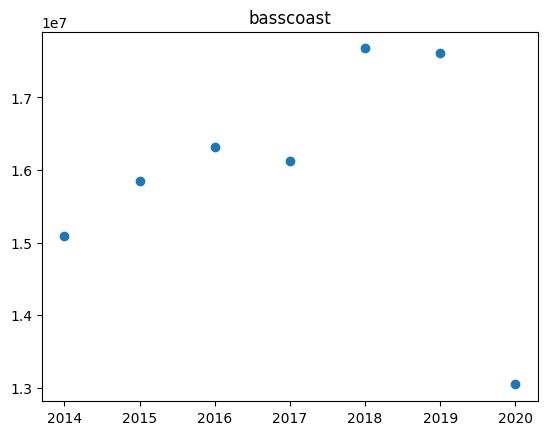

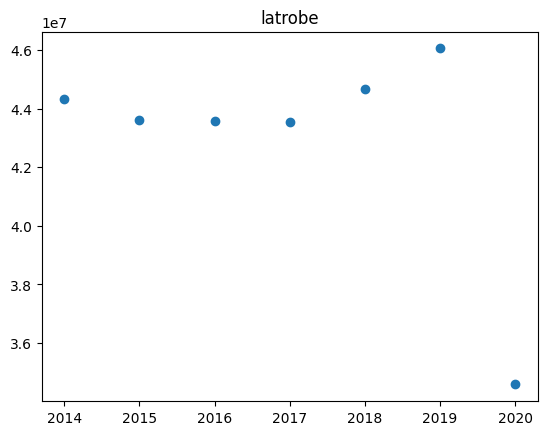

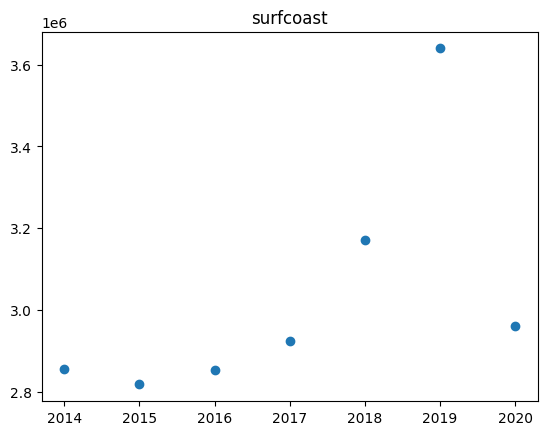

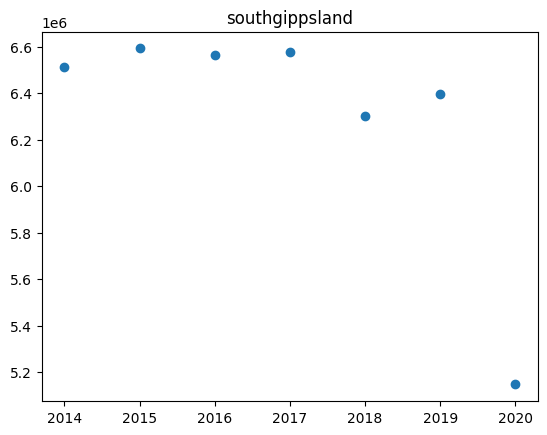

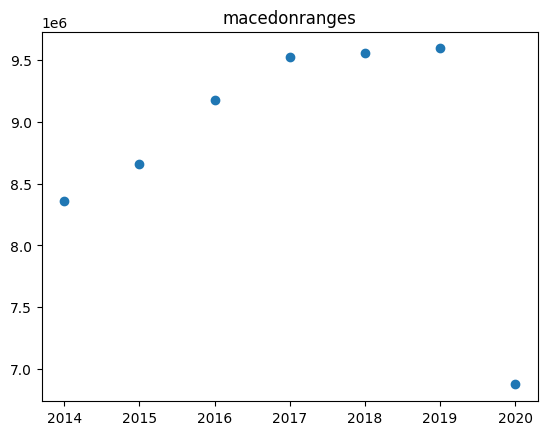

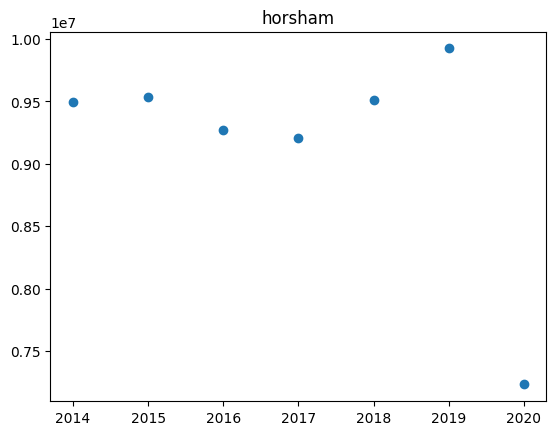

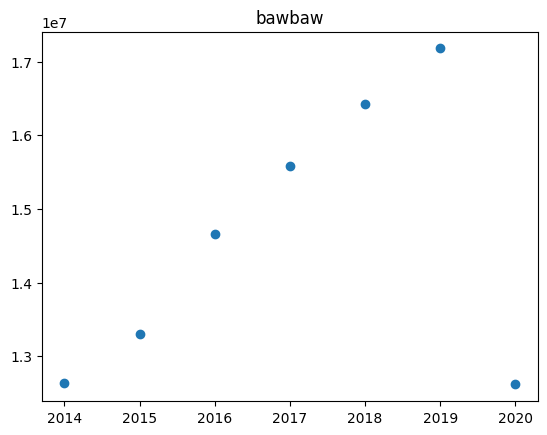

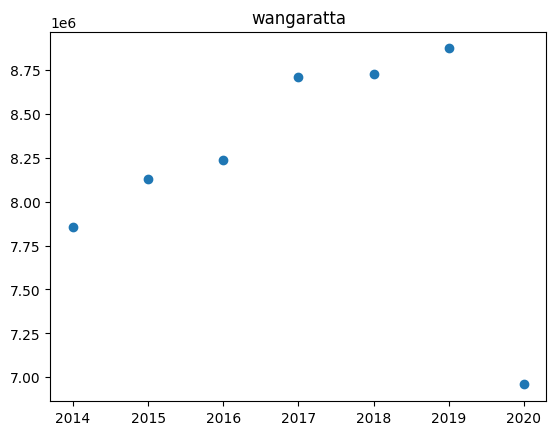

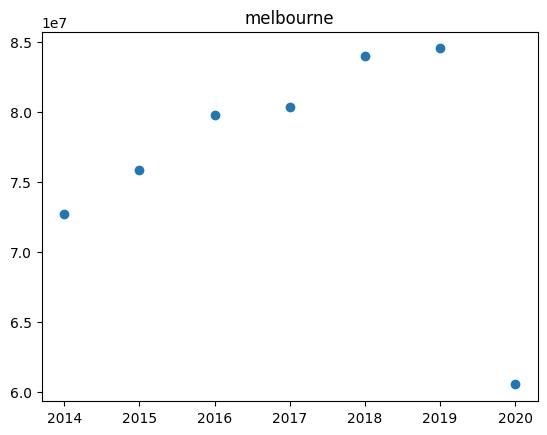

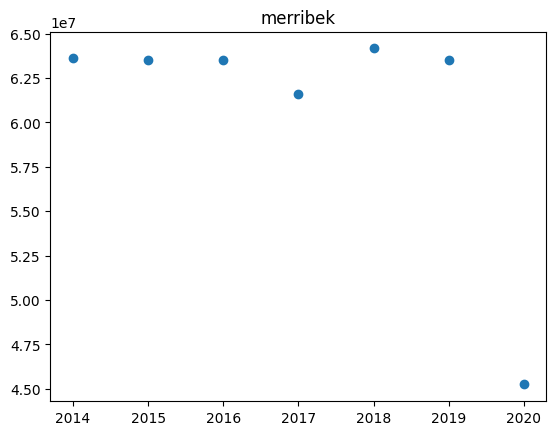

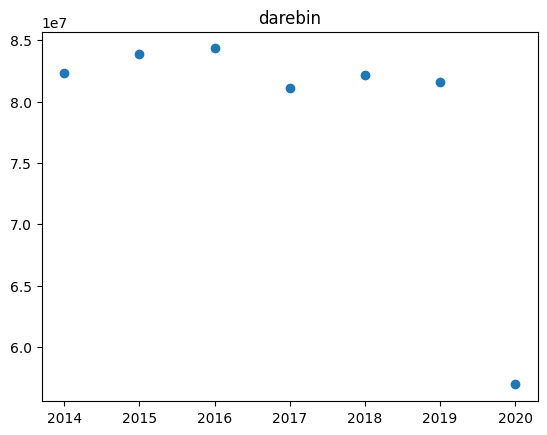

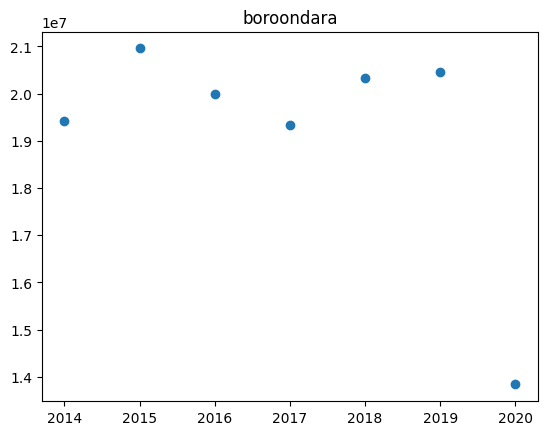

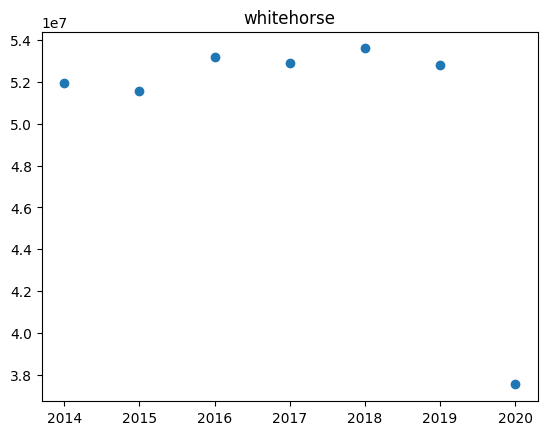

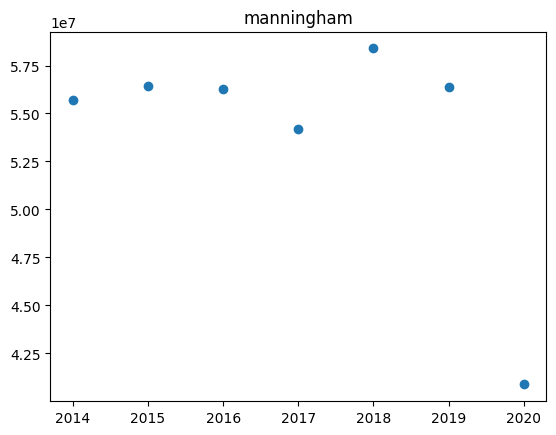

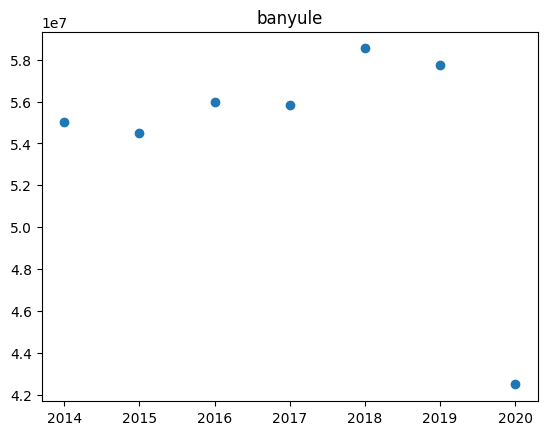

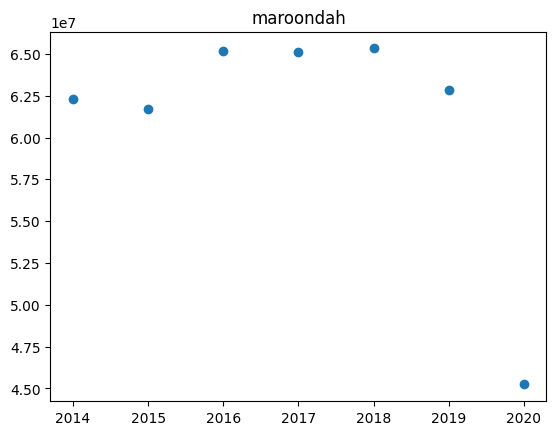

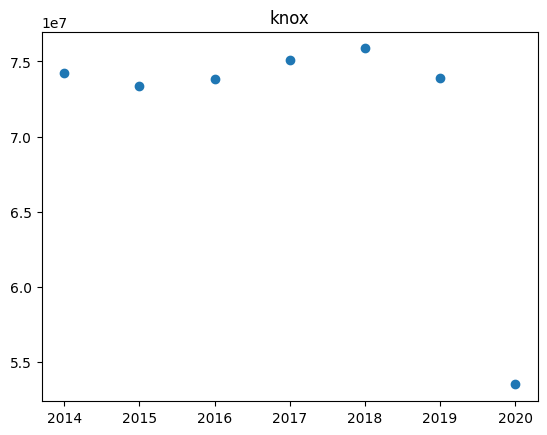

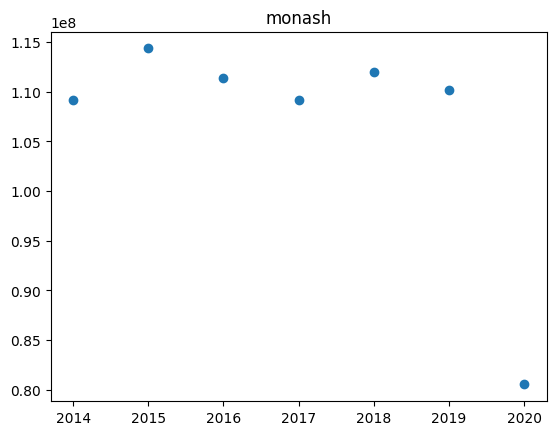

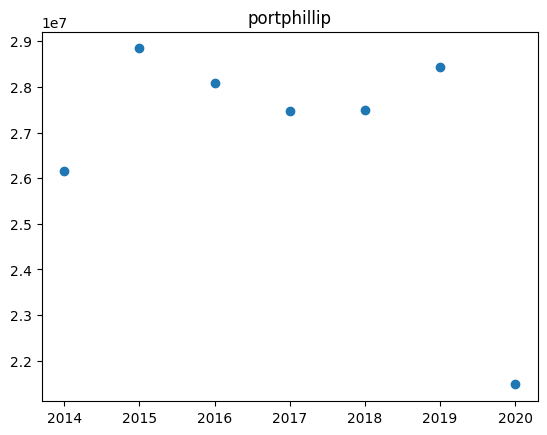

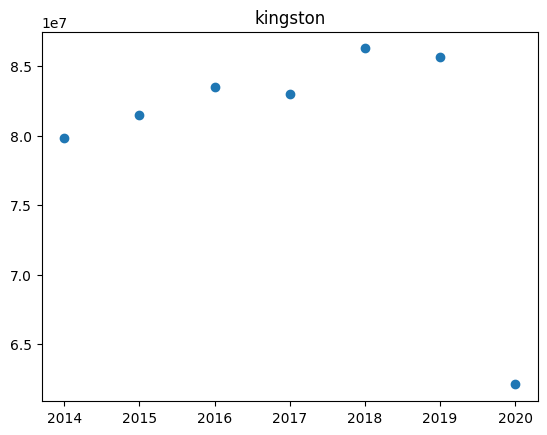

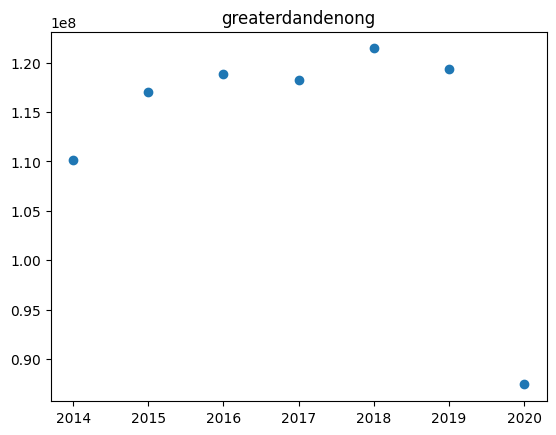

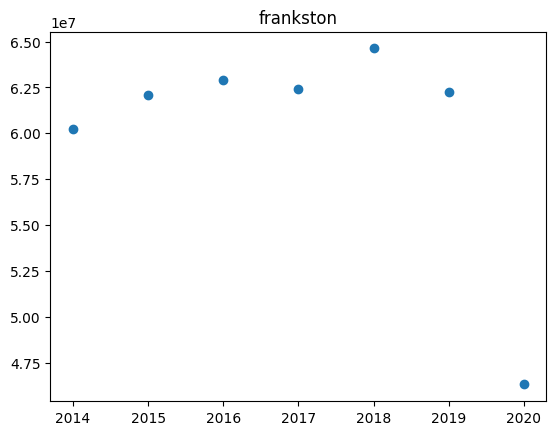

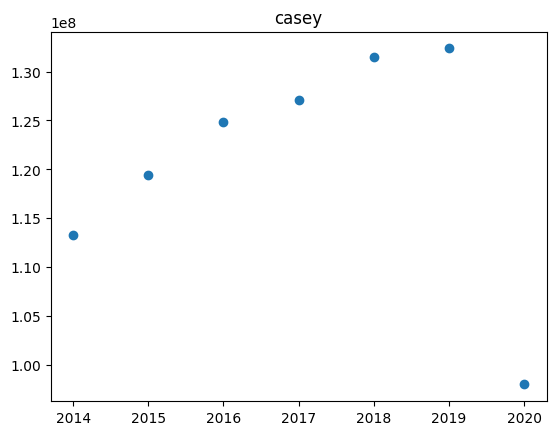

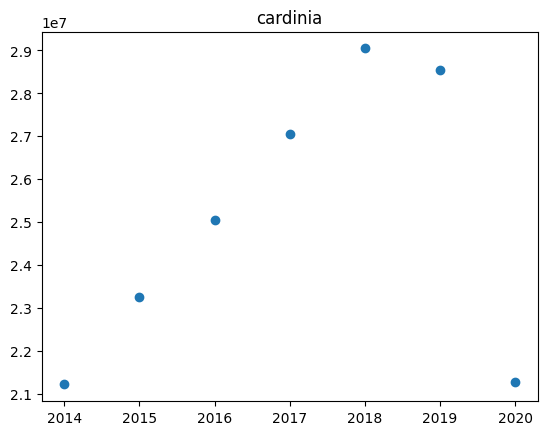

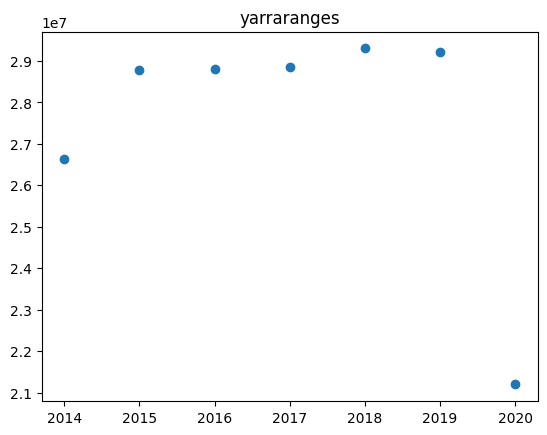

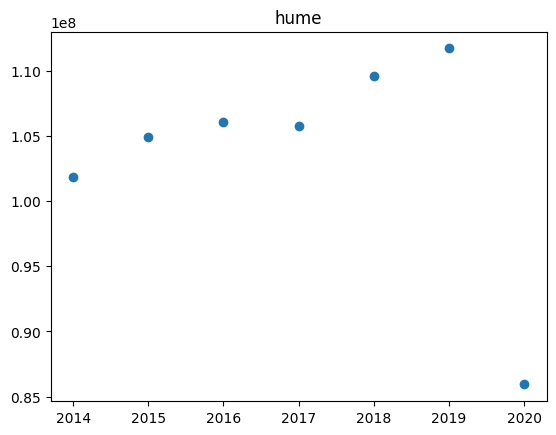

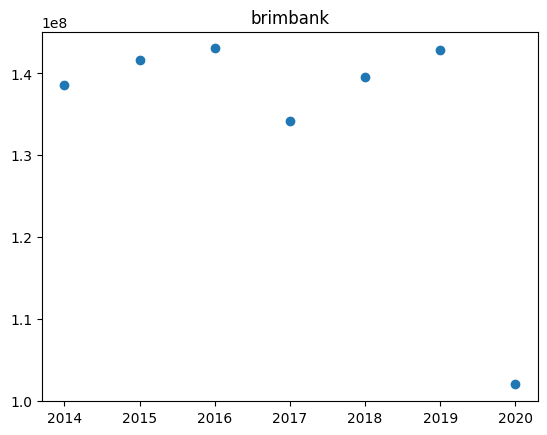

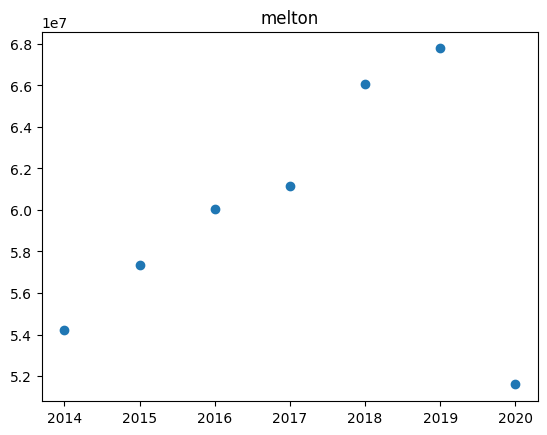

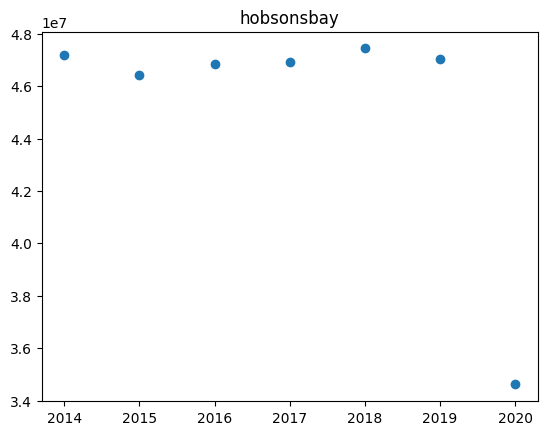

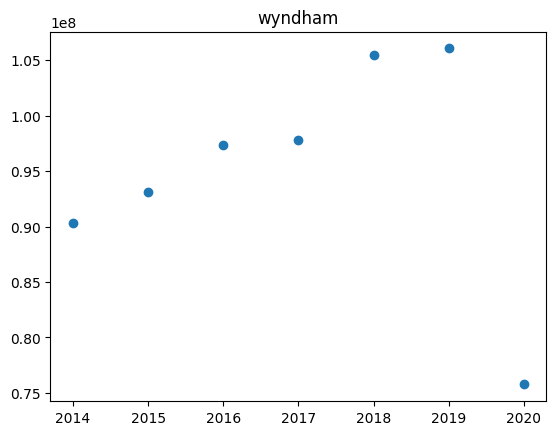

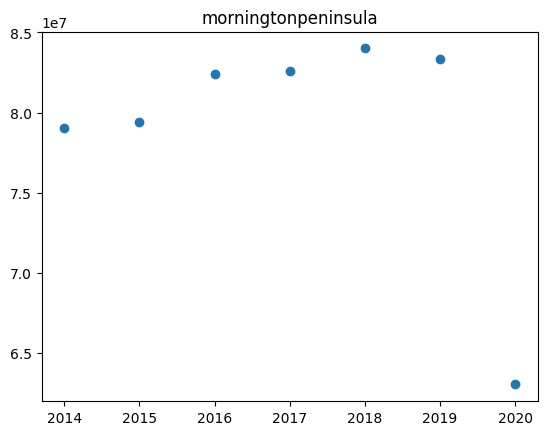

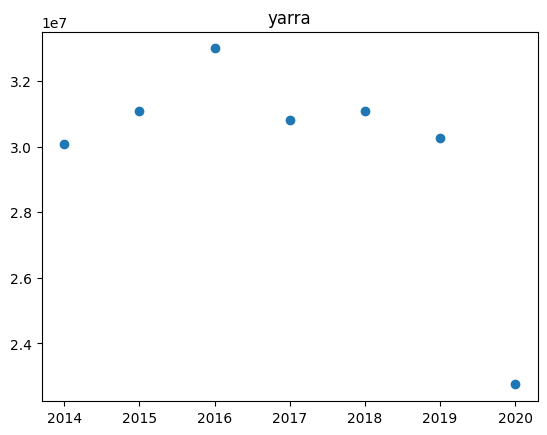

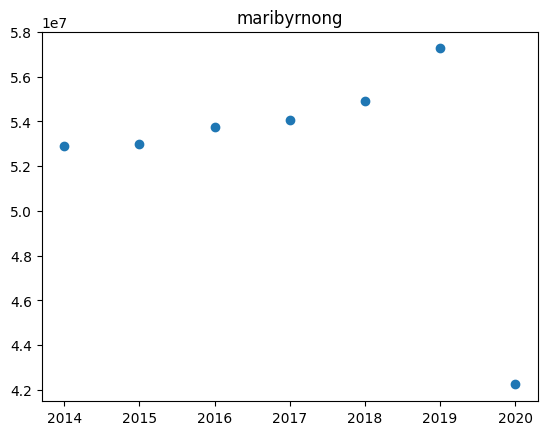

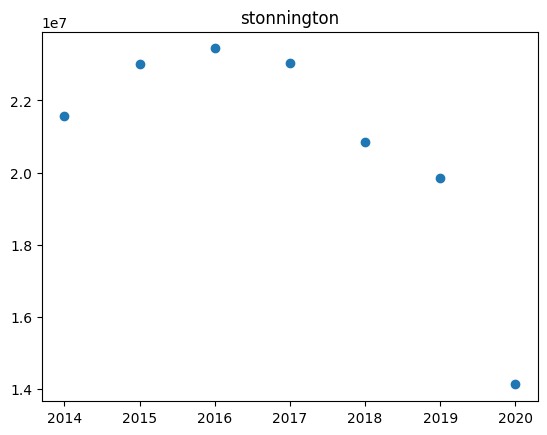

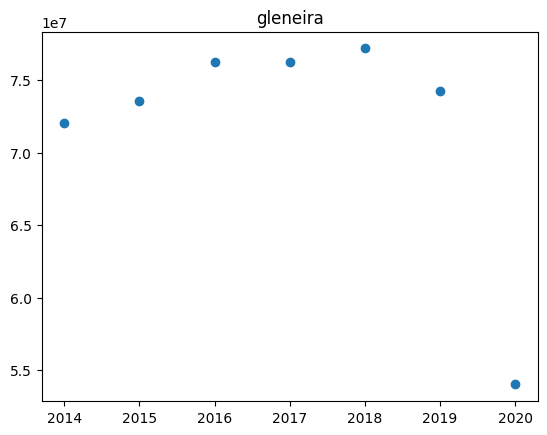

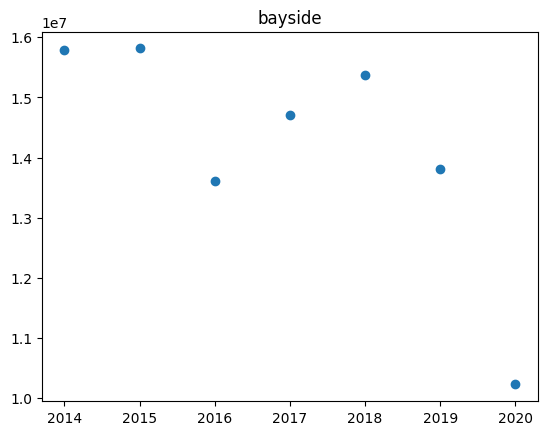

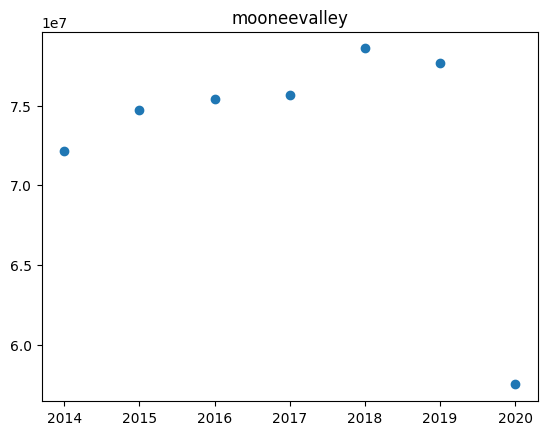

In [7]:
x_axis = [i for i in range(2014, 2021)]
for index, row in preProcess.egm.iterrows():
    plt.figure()
    plt.title(row["LGA Name"])
    plt.plot(x_axis, row[[str(x) for x in x_axis]], 'o')